In [16]:
import pydot
import graphviz

In [17]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [18]:
import numpy as np

In [19]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [20]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarizes current state of dataset"""
    print('Train image shape:',X_train.shape)
    print('Train labels shape:',y_train.shape)
    print('Test image shape:',X_test.shape)
    print('Test labels shape:',y_test.shape)
    print('Train labels:',y_train)
    print('Test labels:',y_test)

In [21]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train image shape: (60000, 28, 28)
Train labels shape: (60000,)
Test image shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [22]:
# Reshape Data

X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32')/255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32')/255

In [23]:
# Categorically Encode Labels

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [9]:
# Check status of dataset

data_summary(X_train, y_train, X_test, y_test)

Train image shape: (60000, 784)
Train labels shape: (60000, 10)
Test image shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
# Build Neural Network

model = models.Sequential()
model.add(Dense(512, activation ='relu', input_shape = (NUM_ROWS*NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

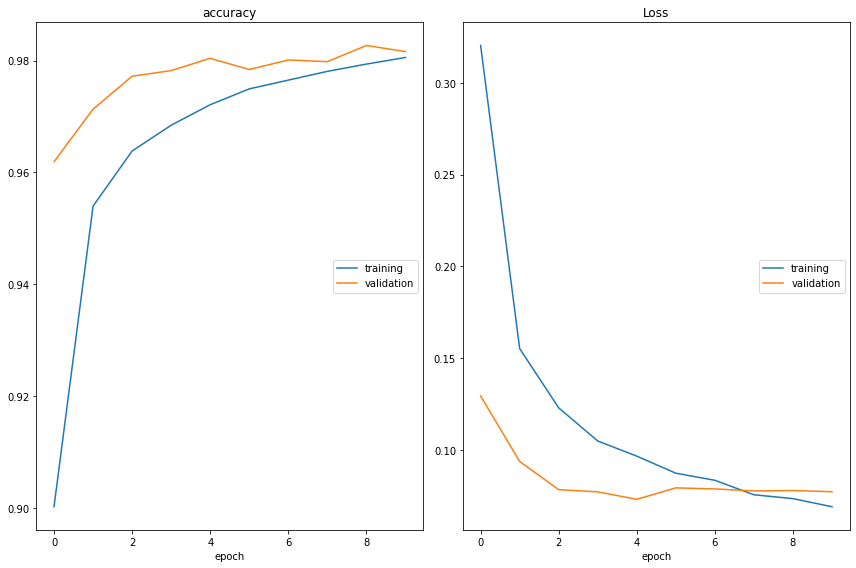

accuracy
	training         	 (min:    0.900, max:    0.981, cur:    0.981)
	validation       	 (min:    0.962, max:    0.983, cur:    0.982)
Loss
	training         	 (min:    0.069, max:    0.320, cur:    0.069)
	validation       	 (min:    0.073, max:    0.129, cur:    0.077)
469/469 [==============================] - 55s 117ms/step - loss: 0.0690 - accuracy: 0.9805 - val_loss: 0.0772 - val_accuracy: 0.9816
Test Loss: 0.07721587270498276
Test Accuracy: 0.9815999865531921


In [11]:
# Compile model
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics =['accuracy'])

# Train model
model.fit(X_train, y_train,
         batch_size= BATCH_SIZE,
         epochs = EPOCHS,
         callbacks = [plot_losses],
         verbose = 1,
         validation_data =(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss:',score[0])
print('Test Accuracy:',score[1])

In [12]:
# Summary of neural network

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Output Network Visualization

SVG(model_to_dot(model).create(prog='dot', format='svg'))

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


AttributeError: 'NoneType' object has no attribute 'create'